# Quick Data Inspection

Simple notebook to take a quick look at the downloaded Deribit BTC data.

In [13]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [14]:
# Define data paths
options_path = Path('../raw/options/feather/deribit/BTC')

print("=== DATA OVERVIEW ===")

print("\n--- OPTIONS ---")

if not options_path.exists():
    print("No options data found")
else:
    files = sorted(list(options_path.glob('*.feather')))
    if not files:
        print("No options files found")
    else:
        print(f"Files: {len(files)} ({files[0].stem} to {files[-1].stem})")
        
        # Load a sample file from the middle
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        
        print(f"Sample file: {sample_file.name}")
        print(f"   Rows: {len(df):,}")
        print(f"   Columns: {list(df.columns)}")
        
        if 'timestamp' in df.columns:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
            print(f"   Time range: {df['datetime'].min()} to {df['datetime'].max()}")
        
        if 'price' in df.columns:
            print(f"   Price range: ${df['price'].min():.4f} - ${df['price'].max():.4f}")
        
        if 'instrument' in df.columns:
            print(f"   Instruments: {df['instrument'].nunique()} unique")
            print(f"   Top 3: {df['instrument'].value_counts().head(3).index.tolist()}")

=== DATA OVERVIEW ===

--- OPTIONS ---
Files: 1613 (2019-03-29 to 2023-08-27)
Sample file: 2021-06-12.feather
   Rows: 4,987
   Columns: ['timestamp', 'id', 'price', 'quantity', 'is_buyer_maker', 'instrument', 'iv', 'mark_price', 'index_price']
   Time range: 2021-06-12 00:00:47.818000+00:00 to 2021-06-12 23:59:56.721000+00:00
   Price range: $0.0005 - $0.7850
   Instruments: 211 unique
   Top 3: ['BTC-2JUL21-36000-P', 'BTC-25JUN21-32000-P', 'BTC-13JUN21-35000-P']


In [15]:
# Load and display sample data (if options exist)
if options_path.exists():
    files = sorted(list(options_path.glob('*.feather')))
    if files:
        print("=== SAMPLE OPTIONS DATA ===")
        
        # Load middle file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        print(f"\nFirst 10 rows from {sample_file.name}:")
        display(df.head(10))
        
        print(f"\nBasic statistics:")
        display(df[['price', 'quantity', 'iv', 'mark_price', 'index_price']].describe())

=== SAMPLE OPTIONS DATA ===

First 10 rows from 2021-06-12.feather:


,timestamp,id,price,quantity,is_buyer_maker,instrument,iv,mark_price,index_price,datetime
0,1623456047818000,161650819,0.2025,0.1,False,BTC-27AUG21-40000-P,91.51,0.199548,37295.15,2021-06-12 00:00:47.818000+00:00
1,1623456047852000,161650821,0.2025,0.1,False,BTC-27AUG21-40000-P,91.51,0.199548,37295.15,2021-06-12 00:00:47.852000+00:00
2,1623456055870000,161650866,0.0235,0.1,False,BTC-13JUN21-37000-C,81.53,0.023547,37259.95,2021-06-12 00:00:55.870000+00:00
3,1623456058538000,161650875,0.1655,0.5,True,BTC-25MAR22-70000-C,97.54,0.161842,37263.83,2021-06-12 00:00:58.538000+00:00
4,1623456181198000,161651188,0.0235,0.2,False,BTC-13JUN21-37000-C,83.50,0.023166,37235.68,2021-06-12 00:03:01.198000+00:00
5,1623456217664000,161651289,0.0505,0.1,True,BTC-25JUN21-36000-P,88.38,0.049862,37226.75,2021-06-12 00:03:37.664000+00:00
6,1623456257235000,161651517,0.0325,0.1,True,BTC-25JUN21-34000-P,92.11,0.031866,37164.06,2021-06-12 00:04:17.235000+00:00
7,1623456319775000,161651679,0.0040,0.1,True,BTC-30JUL21-15000-P,136.63,0.003326,37236.51,2021-06-12 00:05:19.775000+00:00
8,1623456336156000,161651736,0.0145,0.1,True,BTC-25JUN21-44000-C,85.66,0.014250,37268.04,2021-06-12 00:05:36.156000+00:00
9,1623456337214000,161651744,0.0145,0.1,True,BTC-25JUN21-44000-C,85.66,0.014274,37274.05,2021-06-12 00:05:37.214000+00:00



Basic statistics:


,price,quantity,iv,mark_price,index_price
count,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,0.041301,1.082093,97.922458,0.041340,35622.403802
std,0.061587,5.156223,18.074302,0.061688,472.386607
min,0.000500,0.100000,0.000000,0.000000,34668.330000
25%,0.005000,0.100000,87.880000,0.005323,35284.810000
50%,0.019500,0.100000,92.830000,0.019328,35513.720000
75%,0.053250,0.500000,101.015000,0.053688,35856.280000
max,0.785000,200.000000,332.770000,0.782892,37447.760000


=== SIMPLE VISUALIZATION ===


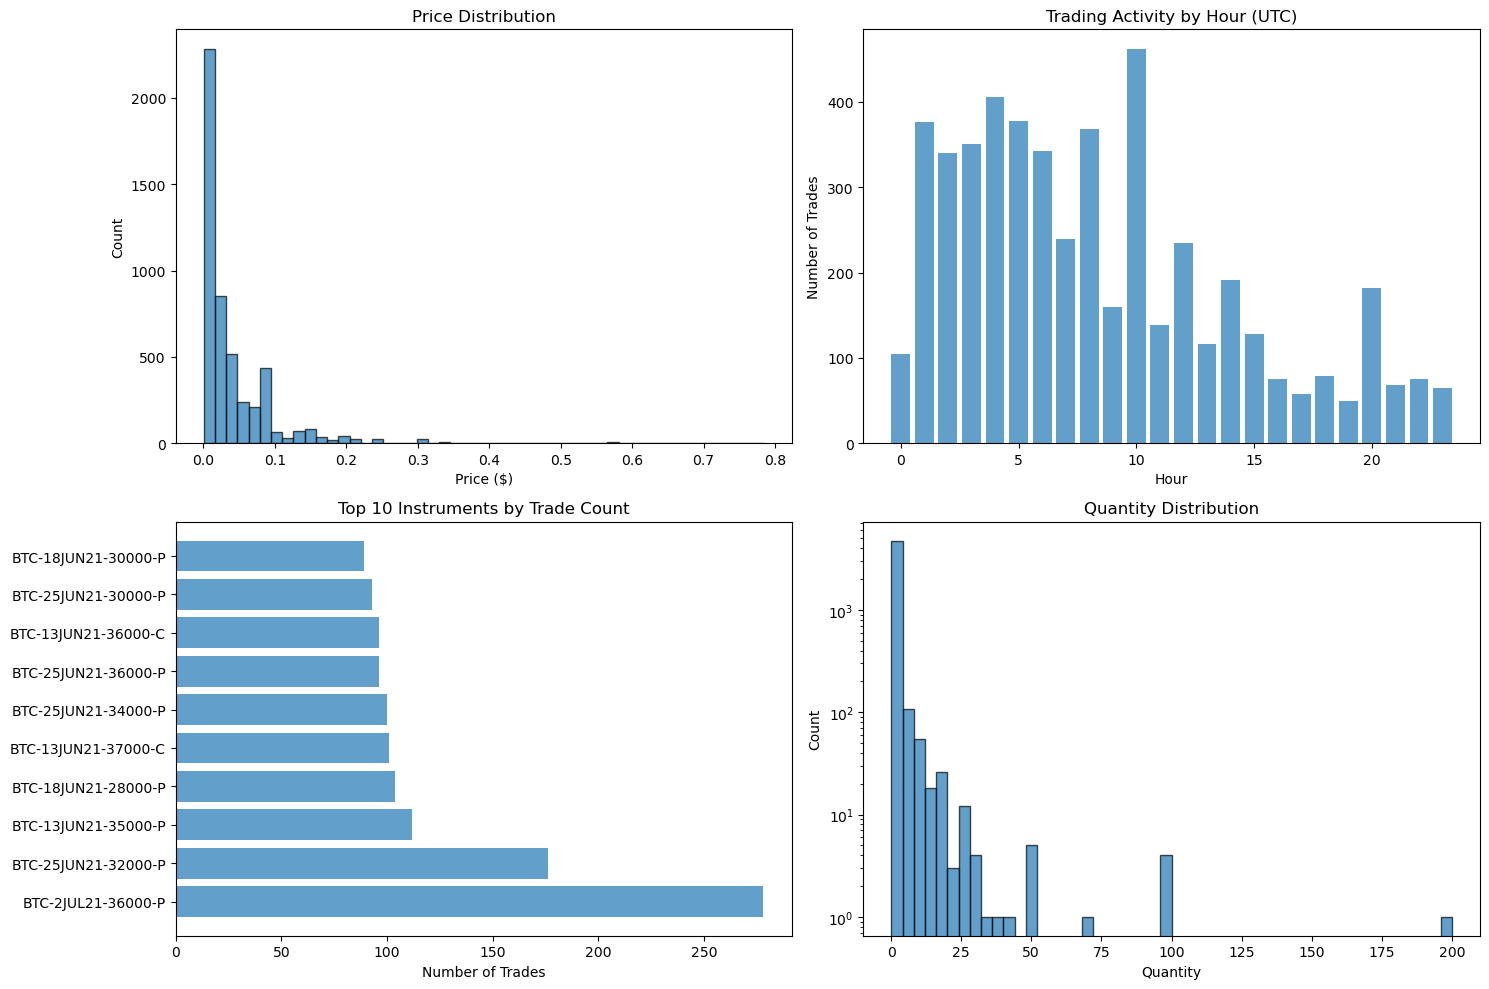


Sample from 2021-06-12.feather (4,987 trades)


In [16]:
# Simple visualization (if data exists)
if options_path.exists():
    files = sorted(list(options_path.glob('*.feather')))
    if files and len(files) > 0:
        print("=== SIMPLE VISUALIZATION ===")
        
        # Load sample file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        # Create simple plots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Price distribution
        ax1.hist(df['price'], bins=50, alpha=0.7, edgecolor='black')
        ax1.set_title('Price Distribution')
        ax1.set_xlabel('Price ($)')
        ax1.set_ylabel('Count')
        
        # Trading activity over time
        df['hour'] = df['datetime'].dt.hour
        hourly_counts = df['hour'].value_counts().sort_index()
        ax2.bar(hourly_counts.index, hourly_counts.values, alpha=0.7)
        ax2.set_title('Trading Activity by Hour (UTC)')
        ax2.set_xlabel('Hour')
        ax2.set_ylabel('Number of Trades')
        
        # Top instruments
        top_instruments = df['instrument'].value_counts().head(10)
        ax3.barh(range(len(top_instruments)), top_instruments.values, alpha=0.7)
        ax3.set_yticks(range(len(top_instruments)))
        ax3.set_yticklabels(top_instruments.index)
        ax3.set_title('Top 10 Instruments by Trade Count')
        ax3.set_xlabel('Number of Trades')
        
        # Quantity distribution
        ax4.hist(df['quantity'], bins=50, alpha=0.7, edgecolor='black')
        ax4.set_title('Quantity Distribution')
        ax4.set_xlabel('Quantity')
        ax4.set_ylabel('Count')
        ax4.set_yscale('log')  # Log scale for better visibility
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nSample from {sample_file.name} ({len(df):,} trades)")